<a href="https://colab.research.google.com/github/LSD20-crypto/NameGenderPred/blob/main/NEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/NationalNames.csv.zip")

In [ ]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [ ]:
data.shape

(1825433, 5)

In [ ]:
data.corr()

,Id,Year,Count
Id,1.000000,0.963427,-0.029869
Year,0.963427,1.000000,-0.022046
Count,-0.029869,-0.022046,1.000000


In [ ]:
data.head(1000)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
995,996,Ralph,1880,M,317
996,997,Ed,1880,M,310
997,998,Claude,1880,M,309
998,999,Edwin,1880,M,309


In [ ]:
data['Name'].nunique()

93889

In [ ]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [ ]:
df=data.groupby('Name').mean()['Gender'].reset_index()
df['Gender'] = df['Gender'].astype('int')
df.head(5)

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [ ]:
import string
letters = list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
vocab = dict(zip(letters, range(1,27),))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:
def word_to_number():
  for i in range(0,df.shape[0]):
    seq = [vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i]= seq


In [ ]:
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [ ]:
X = df['Name'].values
y = df['Gender'].values

In [ ]:
name_length = [len(X[i]) for i in range (0, df.shape[0])]

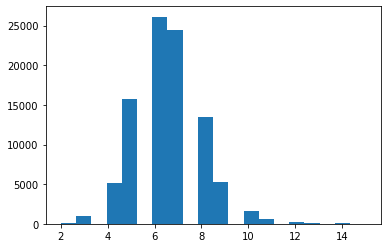

In [ ]:
plt.hist(name_length, bins= 20)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences
x = pad_sequences(df['Name'].values, maxlen= 10, padding='pre')

In [ ]:
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [ ]:
from keras.layers import Input, Embedding, Dense, LSTM 
from keras.models import Model

In [ ]:
vocab_size = len(vocab)+1
vocab_size

27

In [ ]:
inp = Input(shape=(10,))
emn = Embedding(input_dim= vocab_size, output_dim=5)(inp)

lstm1= LSTM(units=32, return_sequences=True)(emn)
lstm2= LSTM(units=64)(lstm1)

out = Dense(units=1 , activation='sigmoid')(lstm2)


my_model = Model(inputs = inp , outputs = out)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 5)             135       
                                                                 
 lstm (LSTM)                 (None, 10, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['acc'])

In [ ]:
his = my_model.fit(x,y, epochs=10, batch_size= 256, validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 17s 43ms/step - loss: 0.5486 - acc: 0.7230 - val_loss: 0.4110 - val_acc: 0.8070
Epoch 2/10
294/294 [==============================] - 12s 39ms/step - loss: 0.4131 - acc: 0.8038 - val_loss: 0.3917 - val_acc: 0.8202
Epoch 3/10
294/294 [==============================] - 12s 39ms/step - loss: 0.3956 - acc: 0.8140 - val_loss: 0.3867 - val_acc: 0.8237
Epoch 4/10
294/294 [==============================] - 11s 39ms/step - loss: 0.3910 - acc: 0.8167 - val_loss: 0.3874 - val_acc: 0.8221
Epoch 5/10
294/294 [==============================] - 12s 39ms/step - loss: 0.3882 - acc: 0.8175 - val_loss: 0.3844 - val_acc: 0.8241
Epoch 6/10
294/294 [==============================] - 12s 39ms/step - loss: 0.3857 - acc: 0.8194 - val_loss: 0.3815 - val_acc: 0.8237
Epoch 7/10
294/294 [==============================] - 12s 39ms/step - loss: 0.3825 - acc: 0.8199 - val_loss: 0.3772 - val_acc: 0.8268
Epoch 8/10
294/294 [==============================] - 12s 39ms

In [ ]:
h = his.history

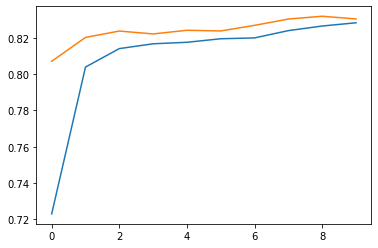

In [ ]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.show()

In [ ]:
name =""
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq],10)
x_test

array([[ 0,  0,  0,  0,  0, 10,  5, 18, 18, 25]], dtype=int32)

In [ ]:
y_pred = my_model.predict(x_test)


In [ ]:
if y_pred < 0.5:
  print('Female')
else:
  print('Male')

Female
